<a href="https://colab.research.google.com/github/harishsundaram07/KnowledgeDiscoveryInDatabases_Group4_Project/blob/main/KDD_Project_Deliverable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing all necessary libraries

In [ ]:
import pandas as pd
from glob import glob

reading all the datafiles for the male players

In [ ]:
male_files = glob("atp*")

In [ ]:
male_files

['atp_matches_2008.csv',
 'atp_matches_2012.csv',
 'atp_matches_1999.csv',
 'atp_matches_2002.csv',
 'atp_matches_1994.csv',
 'atp_matches_1974.csv',
 'atp_matches_1976.csv',
 'atp_matches_1998.csv',
 'atp_matches_2004.csv',
 'atp_matches_1977.csv',
 'atp_matches_1986.csv',
 'atp_matches_1991.csv',
 'atp_matches_2016.csv',
 'atp_matches_2003.csv',
 'atp_matches_1973.csv',
 'atp_matches_2017.csv',
 'atp_matches_2000.csv',
 'atp_matches_2015.csv',
 'atp_matches_2019.csv',
 'atp_matches_1983.csv',
 'atp_matches_1970.csv',
 'atp_matches_2007.csv',
 'atp_matches_2021.csv',
 'atp_matches_1979.csv',
 'atp_matches_2018.csv',
 'atp_matches_1981.csv',
 'atp_matches_2011.csv',
 'atp_matches_1987.csv',
 'atp_matches_1975.csv',
 'atp_matches_1985.csv',
 'atp_matches_1988.csv',
 'atp_matches_1990.csv',
 'atp_matches_2006.csv',
 'atp_matches_1972.csv',
 'atp_matches_1993.csv',
 'atp_matches_2005.csv',
 'atp_matches_1992.csv',
 'atp_matches_2014.csv',
 'atp_matches_1996.csv',
 'atp_matches_1997.csv',


sorting the datafiles according to the year

In [ ]:
male_files.sort()
male_files

['atp_matches_1970.csv',
 'atp_matches_1971.csv',
 'atp_matches_1972.csv',
 'atp_matches_1973.csv',
 'atp_matches_1974.csv',
 'atp_matches_1975.csv',
 'atp_matches_1976.csv',
 'atp_matches_1977.csv',
 'atp_matches_1978.csv',
 'atp_matches_1979.csv',
 'atp_matches_1980.csv',
 'atp_matches_1981.csv',
 'atp_matches_1982.csv',
 'atp_matches_1983.csv',
 'atp_matches_1984.csv',
 'atp_matches_1985.csv',
 'atp_matches_1986.csv',
 'atp_matches_1987.csv',
 'atp_matches_1988.csv',
 'atp_matches_1989.csv',
 'atp_matches_1990.csv',
 'atp_matches_1991.csv',
 'atp_matches_1992.csv',
 'atp_matches_1993.csv',
 'atp_matches_1994.csv',
 'atp_matches_1995.csv',
 'atp_matches_1996.csv',
 'atp_matches_1997.csv',
 'atp_matches_1998.csv',
 'atp_matches_1999.csv',
 'atp_matches_2000.csv',
 'atp_matches_2001.csv',
 'atp_matches_2002.csv',
 'atp_matches_2003.csv',
 'atp_matches_2004.csv',
 'atp_matches_2005.csv',
 'atp_matches_2006.csv',
 'atp_matches_2007.csv',
 'atp_matches_2008.csv',
 'atp_matches_2009.csv',


concatinating all the male players datafiles into a single dataframe

In [ ]:
male_data = pd.concat ((pd.read_csv(file) for file in male_files), ignore_index= True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


the final male players dataset:

In [ ]:
male_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1970-2029,Dublin,Grass,32,A,19700706,271,100106,NaN,NaN,Graham Stilwell,R,173.0,GBR,24.637919,125672,NaN,NaN,Kenneth Reid,U,NaN,IRL,NaN,6-0 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-2029,Dublin,Grass,32,A,19700706,272,209533,NaN,NaN,Harry Sheridan,U,NaN,IRL,NaN,209675,NaN,NaN,B Sweeney,U,NaN,IRL,NaN,6-2 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-2029,Dublin,Grass,32,A,19700706,273,100100,NaN,NaN,Tony Roche,L,178.0,AUS,25.136208,125716,NaN,NaN,James Buckley,U,NaN,IRL,33.223819,6-0 6-0,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-2029,Dublin,Grass,32,A,19700706,274,100060,NaN,NaN,Marty Riessen,R,185.0,USA,28.585900,209674,NaN,NaN,Frank Mcardle,U,NaN,IRL,NaN,6-1 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-2029,Dublin,Grass,32,A,19700706,275,100084,NaN,NaN,Tom Okker,R,178.0,NED,26.368241,209673,NaN,NaN,T Grane,U,NaN,NaN,NaN,6-2 6-0,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
male_data.shape

(176458, 49)

reading all the datafiles for the female players

In [ ]:
female_files = glob("wta*")

In [ ]:
female_files

['wta_matches_1988.csv',
 'wta_matches_1984.csv',
 'wta_matches_2013.csv',
 'wta_matches_1992.csv',
 'wta_matches_2019.csv',
 'wta_matches_1981.csv',
 'wta_matches_1976.csv',
 'wta_matches_2008.csv',
 'wta_matches_2005.csv',
 'wta_matches_1985.csv',
 'wta_matches_1989.csv',
 'wta_matches_2003.csv',
 'wta_matches_1983.csv',
 'wta_matches_2015.csv',
 'wta_matches_1995.csv',
 'wta_matches_1991.csv',
 'wta_matches_1974.csv',
 'wta_matches_2002.csv',
 'wta_matches_1982.csv',
 'wta_matches_1971.csv',
 'wta_matches_1994.csv',
 'wta_matches_2010.csv',
 'wta_matches_1972.csv',
 'wta_matches_1998.csv',
 'wta_matches_2020.csv',
 'wta_matches_2000.csv',
 'wta_matches_2007.csv',
 'wta_matches_1979.csv',
 'wta_matches_1990.csv',
 'wta_matches_1977.csv',
 'wta_matches_1987.csv',
 'wta_matches_2012.csv',
 'wta_matches_2011.csv',
 'wta_matches_2014.csv',
 'wta_matches_1996.csv',
 'wta_matches_2017.csv',
 'wta_matches_1978.csv',
 'wta_matches_1970.csv',
 'wta_matches_1975.csv',
 'wta_matches_2016.csv',


sorting the datafiles according to the year

In [ ]:
female_files.sort()
female_files

['wta_matches_1970.csv',
 'wta_matches_1971.csv',
 'wta_matches_1972.csv',
 'wta_matches_1973.csv',
 'wta_matches_1974.csv',
 'wta_matches_1975.csv',
 'wta_matches_1976.csv',
 'wta_matches_1977.csv',
 'wta_matches_1978.csv',
 'wta_matches_1979.csv',
 'wta_matches_1980.csv',
 'wta_matches_1981.csv',
 'wta_matches_1982.csv',
 'wta_matches_1983.csv',
 'wta_matches_1984.csv',
 'wta_matches_1985.csv',
 'wta_matches_1986.csv',
 'wta_matches_1987.csv',
 'wta_matches_1988.csv',
 'wta_matches_1989.csv',
 'wta_matches_1990.csv',
 'wta_matches_1991.csv',
 'wta_matches_1992.csv',
 'wta_matches_1993.csv',
 'wta_matches_1994.csv',
 'wta_matches_1995.csv',
 'wta_matches_1996.csv',
 'wta_matches_1997.csv',
 'wta_matches_1998.csv',
 'wta_matches_1999.csv',
 'wta_matches_2000.csv',
 'wta_matches_2001.csv',
 'wta_matches_2002.csv',
 'wta_matches_2003.csv',
 'wta_matches_2004.csv',
 'wta_matches_2005.csv',
 'wta_matches_2006.csv',
 'wta_matches_2007.csv',
 'wta_matches_2008.csv',
 'wta_matches_2009.csv',


concatinating all the female players datafiles into a single dataframe

In [ ]:
female_data = pd.concat ((pd.read_csv(file) for file in female_files), ignore_index= True)

the final female players dataset:

In [ ]:
female_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,1,200198,NaN,NaN,Caroline Langsford,U,NaN,AUS,NaN,200199,NaN,NaN,Sally Irvine,U,NaN,AUS,NaN,6-3 6-2,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,2,200188,NaN,NaN,Helen Amos,U,NaN,AUS,21.555099,200172,NaN,NaN,Caroline Cooper,U,NaN,AUS,NaN,6-0 6-3,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,3,200200,NaN,NaN,Norma Marsh,U,NaN,AUS,34.017796,200201,NaN,NaN,Sharon Thomson,U,NaN,AUS,NaN,6-2 7-5,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,4,200203,NaN,NaN,Vicki Lancaster Kerr,U,NaN,AUS,18.981520,200202,NaN,NaN,Theresa Van Haren,U,NaN,AUS,NaN,6-1 6-1,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,5,200204,NaN,NaN,Sandra Walsham,U,NaN,AUS,NaN,200205,NaN,NaN,Judy Harris,U,NaN,AUS,NaN,7-5 6-4,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
female_data.shape

(143757, 49)

Data Preprocessing Steps
Below are the established steps we’ll need to go through to make sure our data is successfully preprocessed.

1. Data quality assessment
2. Data cleaning
3. Data transformation
4. Data reduction

1. Data quality assessment
First we take a good look at our data and get an idea of its overall quality, relevance to our project, and consistency. There are a number of data anomalies and inherent problems to look out for in almost any data set, for example:

Mismatched data types: When you collect data from many different sources, it may come to you in different formats.

Mixed data values: Perhaps different sources use different descriptors for features – for example, man or male. These value descriptors should all be made uniform.

Data outliers: Outliers can have a huge impact on data analysis results.

Missing data: Take a look for missing data fields, blank spaces in text, or unanswered survey questions. This could be due to human error or incomplete data. To take care of missing data, you’ll have to perform data cleaning.


Since all our data comes from a single source we can conclude that there are no inconsistencies with respect to the quality, data types and data values.

2. Data cleaning
Data cleaning is the process of adding missing data and correcting, repairing, or removing incorrect or irrelevant data from a data set. Dating cleaning is the most important step of preprocessing because it will ensure that your data is ready to go for your downstream needs.

Data cleaning will correct all of the inconsistent data you uncovered in your data quality assessment. Depending on the kind of data you’re working with, there are a number of possible cleaners you’ll need to run your data through.

Missing data
There are a number of ways to correct for missing data, but the two most common are:

Ignore the tuples: A tuple is an ordered list or sequence of numbers or entities. If multiple values are missing within tuples, you may simply discard the tuples with that missing information. This is only recommended for large data sets, when a few ignored tuples won’t harm further analysis.

Manually fill in missing data: This can be tedious, but is definitely necessary when working with smaller data sets.


Let us check our datasets for any missing data.

In [ ]:
missing_male_data = male_data.isnull()
missing_male_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,True,True,False,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
missing_female_data = female_data.isnull()
missing_female_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,True,True,False,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,True,True,False,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,True,True,False,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,True,True,False,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,True,True,False,False,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


we can see from the above values that our datasets contain null values which could be harmful for our analysis.

lets see the count of the null values for each columns and then find the overall percentage of those null values.


First lets do it for the Male players dataframe

In [ ]:
sum_missing_male_data = missing_male_data.sum()
sum_missing_male_data

tourney_id                 0
tourney_name               0
surface                 2489
draw_size                  0
tourney_level              0
tourney_date               0
match_num                  0
winner_id                  0
winner_seed           109158
winner_entry          160799
winner_name                0
winner_hand               43
winner_ht              18033
winner_ioc                 7
winner_age              1691
loser_id                   0
loser_seed            142288
loser_entry           149800
loser_name                 0
loser_hand               107
loser_ht               30144
loser_ioc                 33
loser_age               4865
score                     11
best_of                    0
round                      0
minutes                90111
w_ace                  87506
w_df                   87506
w_svpt                 87506
w_1stIn                87506
w_1stWon               87506
w_2ndWon               87506
w_SvGms                87505
w_bpSaved     

In [ ]:
len(male_data)

176458

In [ ]:
percentage_missing_male_data = (sum_missing_male_data / len(male_data))*100
percentage_missing_male_data

tourney_id             0.000000
tourney_name           0.000000
surface                1.410534
draw_size              0.000000
tourney_level          0.000000
tourney_date           0.000000
match_num              0.000000
winner_id              0.000000
winner_seed           61.860613
winner_entry          91.125934
winner_name            0.000000
winner_hand            0.024368
winner_ht             10.219429
winner_ioc             0.003967
winner_age             0.958302
loser_id               0.000000
loser_seed            80.635619
loser_entry           84.892722
loser_name             0.000000
loser_hand             0.060638
loser_ht              17.082819
loser_ioc              0.018701
loser_age              2.757030
score                  0.006234
best_of                0.000000
round                  0.000000
minutes               51.066543
w_ace                 49.590271
w_df                  49.590271
w_svpt                49.590271
w_1stIn               49.590271
w_1stWon

Now for the female players dataframe

In [ ]:
sum_missing_female_data = missing_female_data.sum()
sum_missing_female_data

tourney_id                 0
tourney_name               0
surface                 4683
draw_size              16915
tourney_level              0
tourney_date               0
match_num                  0
winner_id                  0
winner_seed            87554
winner_entry          131635
winner_name                0
winner_hand                0
winner_ht              82771
winner_ioc                25
winner_age              2258
loser_id                   0
loser_seed            116760
loser_entry           123256
loser_name                 0
loser_hand                 0
loser_ht               98003
loser_ioc                141
loser_age               6093
score                      1
best_of                    0
round                      0
minutes               129233
w_ace                 107702
w_df                  107559
w_svpt                107700
w_1stIn               107700
w_1stWon              107700
w_2ndWon              107700
w_SvGms               127545
w_bpSaved     

In [ ]:
len(female_data)

143757

In [ ]:
percentage_missing_female_data = (sum_missing_female_data / len(female_data))*100
percentage_missing_female_data

tourney_id             0.000000
tourney_name           0.000000
surface                3.257581
draw_size             11.766384
tourney_level          0.000000
tourney_date           0.000000
match_num              0.000000
winner_id              0.000000
winner_seed           60.904165
winner_entry          91.567715
winner_name            0.000000
winner_hand            0.000000
winner_ht             57.577022
winner_ioc             0.017390
winner_age             1.570706
loser_id               0.000000
loser_seed            81.220393
loser_entry           85.739129
loser_name             0.000000
loser_hand             0.000000
loser_ht              68.172680
loser_ioc              0.098082
loser_age              4.238402
score                  0.000696
best_of                0.000000
round                  0.000000
minutes               89.896840
w_ace                 74.919482
w_df                  74.820009
w_svpt                74.918091
w_1stIn               74.918091
w_1stWon

From the above analysis we can see that there are many columns in both the datafarmes with very high percentage of missing data. We will now drop those columns from the dataframes.

In [ ]:
male_perc = 50.0
male_min_count = int(((100-male_perc)/100)*male_data.shape[0] + 1)
new_male_data = male_data.dropna( axis=1, 
                thresh=male_min_count)

female_perc = 70.0
female_min_count = int(((100-female_perc)/100)*female_data.shape[0] + 1)
new_female_data = female_data.dropna(axis =1, thresh = female_min_count)

In [ ]:
new_male_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1970-2029,Dublin,Grass,32,A,19700706,271,100106,Graham Stilwell,R,173.0,GBR,24.637919,125672,Kenneth Reid,U,NaN,IRL,NaN,6-0 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-2029,Dublin,Grass,32,A,19700706,272,209533,Harry Sheridan,U,NaN,IRL,NaN,209675,B Sweeney,U,NaN,IRL,NaN,6-2 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-2029,Dublin,Grass,32,A,19700706,273,100100,Tony Roche,L,178.0,AUS,25.136208,125716,James Buckley,U,NaN,IRL,33.223819,6-0 6-0,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-2029,Dublin,Grass,32,A,19700706,274,100060,Marty Riessen,R,185.0,USA,28.585900,209674,Frank Mcardle,U,NaN,IRL,NaN,6-1 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-2029,Dublin,Grass,32,A,19700706,275,100084,Tom Okker,R,178.0,NED,26.368241,209673,T Grane,U,NaN,NaN,NaN,6-2 6-0,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_male_data.shape

(176458, 44)

In [ ]:
new_female_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,1,200198,NaN,Caroline Langsford,U,NaN,AUS,NaN,200199,Sally Irvine,U,NaN,AUS,NaN,6-3 6-2,3,R64,NaN,NaN,NaN,NaN
1,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,2,200188,NaN,Helen Amos,U,NaN,AUS,21.555099,200172,Caroline Cooper,U,NaN,AUS,NaN,6-0 6-3,3,R64,NaN,NaN,NaN,NaN
2,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,3,200200,NaN,Norma Marsh,U,NaN,AUS,34.017796,200201,Sharon Thomson,U,NaN,AUS,NaN,6-2 7-5,3,R64,NaN,NaN,NaN,NaN
3,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,4,200203,NaN,Vicki Lancaster Kerr,U,NaN,AUS,18.981520,200202,Theresa Van Haren,U,NaN,AUS,NaN,6-1 6-1,3,R64,NaN,NaN,NaN,NaN
4,1970-W-SL-AUS-01A-1970,Australian Open,Grass,43,G,19700119,5,200204,NaN,Sandra Walsham,U,NaN,AUS,NaN,200205,Judy Harris,U,NaN,AUS,NaN,7-5 6-4,3,R64,NaN,NaN,NaN,NaN


In [ ]:
new_female_data.shape

(143757, 27)

There are some columns with missing data which are useful for our analysis. Let us fill those columns with either a string or mean of the values in those columns.

In [ ]:
percentage_missing_male_data

tourney_id             0.000000
tourney_name           0.000000
surface                1.410534
draw_size              0.000000
tourney_level          0.000000
tourney_date           0.000000
match_num              0.000000
winner_id              0.000000
winner_seed           61.860613
winner_entry          91.125934
winner_name            0.000000
winner_hand            0.024368
winner_ht             10.219429
winner_ioc             0.003967
winner_age             0.958302
loser_id               0.000000
loser_seed            80.635619
loser_entry           84.892722
loser_name             0.000000
loser_hand             0.060638
loser_ht              17.082819
loser_ioc              0.018701
loser_age              2.757030
score                  0.006234
best_of                0.000000
round                  0.000000
minutes               51.066543
w_ace                 49.590271
w_df                  49.590271
w_svpt                49.590271
w_1stIn               49.590271
w_1stWon

**Changed the null values in Surface column not 'Not Mentioned'**

In [ ]:
new_male_data.surface.fillna('Not Mentioned', inplace=True)
new_male_data.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
176453,2021-9410,Nur-Sultan,Hard,32,A,20210920,276,207518,Lorenzo Musetti,R,185.0,ITA,19.550992,117360,Marc Polmans,R,NaN,AUS,24.386037,6-4 2-6 6-4,3,R32,4.0,5.0,82.0,49.0,30.0,15.0,14.0,5.0,10.0,0.0,2.0,85.0,55.0,37.0,11.0,14.0,4.0,9.0,57.0,1108.0,165.0,437.0
176454,2021-9410,Nur-Sultan,Hard,32,A,20210920,275,126952,Soon Woo Kwon,R,180.0,KOR,23.800137,105539,Evgeny Donskoy,R,185.0,RUS,31.367556,6-4 6-3,3,R32,6.0,0.0,52.0,31.0,24.0,15.0,9.0,0.0,0.0,2.0,1.0,63.0,33.0,21.0,15.0,10.0,3.0,6.0,82.0,899.0,150.0,498.0
176455,2021-9410,Nur-Sultan,Hard,32,A,20210920,273,106078,Egor Gerasimov,R,196.0,BLR,28.856947,105332,Benoit Paire,R,196.0,FRA,32.369610,7-5 6-4,3,R32,2.0,4.0,69.0,48.0,33.0,9.0,11.0,2.0,5.0,6.0,5.0,68.0,41.0,31.0,6.0,11.0,4.0,9.0,97.0,769.0,53.0,1295.0
176456,2021-9410,Nur-Sultan,Hard,32,A,20210920,272,126535,Carlos Taberner,R,NaN,ESP,24.117728,105575,Ricardas Berankis,R,175.0,LTU,31.249829,7-5 6-4,3,R32,5.0,5.0,62.0,35.0,29.0,9.0,11.0,2.0,5.0,2.0,3.0,68.0,37.0,24.0,12.0,11.0,6.0,11.0,117.0,668.0,109.0,733.0
176457,2021-9410,Nur-Sultan,Hard,32,A,20210920,271,200175,Miomir Kecmanovic,R,183.0,SRB,22.056126,104269,Fernando Verdasco,L,188.0,ESP,37.848049,6-4 6-2,3,R32,1.0,3.0,53.0,30.0,24.0,13.0,9.0,1.0,2.0,4.0,5.0,64.0,39.0,20.0,11.0,9.0,10.0,14.0,60.0,1025.0,134.0,564.0


In [ ]:
frequency = new_male_data['surface'].value_counts(dropna=False)
frequency

Hard             70741
Clay             63504
Carpet           20148
Grass            19576
Not Mentioned     2489
Name: surface, dtype: int64

**Below we are changing the null winner & loser age of Male players to it mean.**

In [ ]:
mean_male_winner_age = new_male_data['winner_age'].mean()
print(mean_male_winner_age)
mean_male_loser_age = new_male_data['loser_age'].mean()
print(mean_male_loser_age)

25.679200977186916
25.733056006135048


In [ ]:
new_male_data.winner_age.fillna(mean_male_winner_age, inplace=True)
new_male_data.loser_age.fillna(mean_male_loser_age, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


**Below we are changing the null winner & loser age of Female players to it mean.**

In [ ]:
mean_female_loser_age = new_female_data['loser_age'].mean()
print(mean_female_loser_age)
mean_female_winner_age = new_female_data['winner_age'].mean()
print(mean_female_winner_age)

23.44496974410716
23.52197319519676


In [ ]:
new_female_data.loser_age.fillna(mean_loser_age, inplace=True)
new_female_data.winner_age.fillna(mean_female_winner_age, inplace=True)




/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


**Below we are changing the null winner & loser height of Male players to it mean.**



In [ ]:
mean_winner_ht = new_male_data['winner_ht'].mean()
print(mean_winner_ht)
new_male_data.winner_ht.fillna(mean_winner_ht, inplace=True)



184.44958813318604


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
mean_loser_ht = new_male_data['loser_ht'].mean()
print(mean_loser_ht)
new_male_data.loser_ht.fillna(mean_loser_ht, inplace=True)



184.21789439151414


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:

mean_floser_ht = new_female_data['loser_ht'].mean()
print(mean_floser_ht)
new_female_data.loser_ht.fillna(mean_floser_ht, inplace=True)


172.29431306552434


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
mean_fwinner_ht = new_female_data['winner_ht'].mean()
print(mean_fwinner_ht)
new_female_data.winner_ht.fillna(mean_fwinner_ht, inplace=True)





172.67121962417605


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
new_female_data.drop(new_female_data.columns.difference(['tourney_name','surface' , 'winner_name' , 'winner_hand' , 'winner_age' , 'winner_ht' , 'winner_ioc' , 'loser_name' , 'loser_hand' , 'loser_age' , 'loser_ht' , 'loser_ioc' ,'round']), 1, inplace=False)


,tourney_name,surface,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,round
0,Australian Open,Grass,Caroline Langsford,U,172.67122,AUS,23.521973,Sally Irvine,U,172.294313,AUS,23.444970,R64
1,Australian Open,Grass,Helen Amos,U,172.67122,AUS,21.555099,Caroline Cooper,U,172.294313,AUS,23.444970,R64
2,Australian Open,Grass,Norma Marsh,U,172.67122,AUS,34.017796,Sharon Thomson,U,172.294313,AUS,23.444970,R64
3,Australian Open,Grass,Vicki Lancaster Kerr,U,172.67122,AUS,18.981520,Theresa Van Haren,U,172.294313,AUS,23.444970,R64
4,Australian Open,Grass,Sandra Walsham,U,172.67122,AUS,23.521973,Judy Harris,U,172.294313,AUS,23.444970,R64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143752,BJK Cup Playoffs: NED vs CHN,Clay,Arantxa Rus,L,180.00000,NED,30.343600,Xin Yu Wang,R,182.000000,CHN,19.556468,RR
143753,BJK Cup Playoffs: ROU vs ITA,Hard,Elisabetta Cocciaretto,R,172.67122,ITA,20.224504,Irina Maria Bara,R,172.294313,ROU,26.083504,RR
143754,BJK Cup Playoffs: ROU vs ITA,Hard,Martina Trevisan,L,160.00000,ITA,27.452430,Mihaela Buzarnescu,L,172.294313,ROU,32.952772,RR
143755,BJK Cup Playoffs: ROU vs ITA,Hard,Elena Gabriela Ruse,U,172.67122,ROU,23.444216,Jasmine Paolini,R,172.294313,ITA,25.284052,RR


In [ ]:
new_male_data.drop(new_male_data.columns.difference(['tourney_name','surface' , 'winner_name' , 'winner_hand' , 'winner_age' , 'winner_ht' , 'winner_ioc' , 'loser_name' , 'loser_hand' , 'loser_age' , 'loser_ht' , 'loser_ioc','round' ]), 1, inplace=False)

,tourney_name,surface,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,round
0,Dublin,Grass,Graham Stilwell,R,173.000000,GBR,24.637919,Kenneth Reid,U,184.217894,IRL,25.733056,R32
1,Dublin,Grass,Harry Sheridan,U,184.449588,IRL,25.679201,B Sweeney,U,184.217894,IRL,25.733056,R32
2,Dublin,Grass,Tony Roche,L,178.000000,AUS,25.136208,James Buckley,U,184.217894,IRL,33.223819,R32
3,Dublin,Grass,Marty Riessen,R,185.000000,USA,28.585900,Frank Mcardle,U,184.217894,IRL,25.733056,R32
4,Dublin,Grass,Tom Okker,R,178.000000,NED,26.368241,T Grane,U,184.217894,NaN,25.733056,R32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176453,Nur-Sultan,Hard,Lorenzo Musetti,R,185.000000,ITA,19.550992,Marc Polmans,R,184.217894,AUS,24.386037,R32
176454,Nur-Sultan,Hard,Soon Woo Kwon,R,180.000000,KOR,23.800137,Evgeny Donskoy,R,185.000000,RUS,31.367556,R32
176455,Nur-Sultan,Hard,Egor Gerasimov,R,196.000000,BLR,28.856947,Benoit Paire,R,196.000000,FRA,32.369610,R32
176456,Nur-Sultan,Hard,Carlos Taberner,R,184.449588,ESP,24.117728,Ricardas Berankis,R,175.000000,LTU,31.249829,R32


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


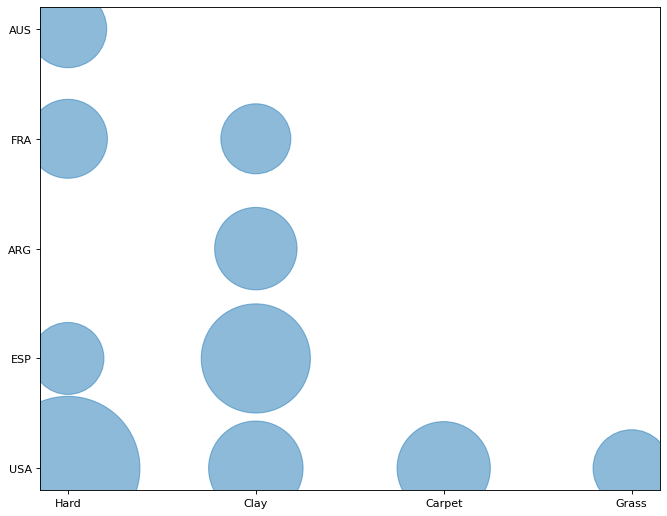

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
new_male_data.winner_ioc.fillna('Test', inplace=True)
plt.figure(figsize=(10, 8), dpi=80)
plt_1 = new_male_data[['surface','winner_ioc','winner_id']].groupby(['surface','winner_ioc']).size().reset_index(name='counts').sort_values('counts',ascending=False).head(10)

N = 50
x = plt_1['surface']
y = plt_1['winner_ioc']
s=plt_1['counts']
#colors = np.random.rand(len())

plt.scatter(x, y,s, alpha=0.5)
plt.show()

**The above graph gives a view of country vs surface which can help us understand which country plays better on which surface. This can help us understand where players of a certain country need to improve. Eg: USA plays very good on Hard surfaces as compared to Grass. This shows us that players in United States need to focus on Grass courts more.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


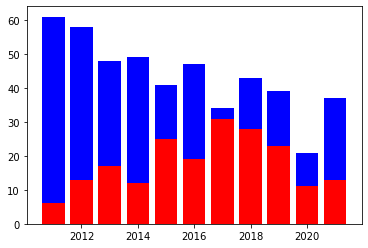

In [ ]:
plt_2 = new_male_data[new_male_data['round'] == 'F']

conditions = [
    (plt_2['winner_age'] >20) & (plt_2['winner_age'] <30),
    (plt_2['winner_age'] >30)  ]

values = ['20 to 30', '30+']
plt_2['AgeGroup'] = np.select(conditions, values)
plt_2 = plt_2[['AgeGroup','tourney_date']]
plt_2['tourney_date'] = plt_2['tourney_date']//10000
plt_2 = plt_2.groupby(['AgeGroup','tourney_date']).size().reset_index(name='counts').sort_values('counts',ascending=False)
plt_2 = plt_2[plt_2['tourney_date'] > 2010]
#plt_2['tourney_date'] = pd.Categorical(plt_2.tourney_date)
plt_2_1 = plt_2[plt_2['AgeGroup'] == '20 to 30']
plt_2_2 = plt_2[plt_2['AgeGroup'] == '30+']

plt.bar(plt_2_1['tourney_date'],plt_2_1['counts'],color = 'blue')
#plt.show()
plt.bar(plt_2_2['tourney_date'],plt_2_2['counts'],color = 'red')
plt.show()

**The above graph gives a view of age vs year, which shows us which age group performed well given an year. The color red shows age group 20 to 30 where as blue shows all players 30+. As we can see, players above 30 dominated the matches of the year 2012.**